# Non Target Analysis of Environmental Mass Spectrometry Data 

{bdg-link-info}`Reference [1] <https://link.springer.com/article/10.1007/s00216-015-8681-7>`
{bdg-link-info}`Reference [2] <https://doi.org/10.1016/j.trac.2023.116944>`
{bdg-link-info}`Reference [3] <https://doi.org/10.1016/j.trac.2019.04.008>`
{bdg-link-info}`Reference [4] <https://pubmed.ncbi.nlm.nih.gov/36174727/>`
{bdg-link-info}`DSFP Homepage <https://dsfp.norman-data.eu/>`
{bdg-link-info}`Notebook Repository <hhttps://github.com/NERC-CEH/DSFP-PyExplorer>`
{bdg-warning-line}`Ongoing Development`
![alt text](../images/ukceh-logo-badge.png "Title")

Primary Contact: [Dr. Ezra Kitson](https://www.ceh.ac.uk/staff/ezra-kitson) | Notebook Top-to-Bottom Runtime ~ 2 Minutes

````{card} Challenge:
Environmental mass-spectrometry often returns data on many more compounds than just those compounds that were the target of the analysis. Non-target analysis is the analysis of the non-target compounds in an analytical spectrum. The first step in non-target analysis for mass spectrometry is non-target screening, which involves starting with a peak in the spectrum at a mass of interest and using all the available information (e.g. retention time, isotope peaks, fragment peaks) to go from a mass to an unequivocal molecular formula, and eventually a confirmed structure [1]. 

In recent years there has been work to standardise and refine this workflow [2], [3] resulting in the creation of the NORMAN Digital Sample Freezing Platform (DSFP), a web portal where users can upload raw mass spectrometry data from a particular project (known as a collection) and have the data automatically screened for non-target analysis peaks [3]. This non-target screening data is then available publicly for download.

The second step of non-target analysis is to perform statistical analysis of the non-target screening data. There are currently a lack of tools to do this on the data available on the NORMAN-DSFP. The purpose of this work was to develop a Python library to make it easier to download, process and analyse the wealth of non-target analysis data available on the NORMAN-DSFP. 
````

````{card} Approach:
We developed a Python library, DSFP-PyExplorer  to enable statistical analysis of non-target analysis data present on the NORMAN Digital Sample Freezing Platform  (DSFP). The library can be run from the command line and the scripts are parametrised by a single .yaml file. The library uses the REST API of the DSFP to download collections and then uses the Pandas and Numpy Python libraries to process the data into a metadata table and an ordination matrix, ready for statistical analysis 
````

```{admonition} Running the Notebook:
:class: tip, dropdown
To run the notebook it is advised to first clone the repository housing the notebook ('*git clone https://github.com/NERC-CEH/DSFP-PyExplorer*'). This will create a folder in the current directory called *DSFP-PyEplorer*, which holds all the relevant files including the notebook, environment file and relevant input data.
```

```{contents}
:local:
```
<!-- https://jupyterbook.org/en/stable/structure/configure.html -->

## Introduction

This notebook demonstrates how to use the DSFP-PyExplorer Python library, to download, process and analyse non target analysis mass spectrometry data located on the NORMAN Digital Sample Freezing Platform (DSFP).

## Downloading data 

```{admonition} Data Access:
:class: note, dropdown
Life-APEX data has been predownloaded from the NORMAN-DSFP and stored in the GitHub repository housing this notebook. As such, you do not need to run the commands in the 'downloading data' section of this notebook, however if you would like to process a different data collection, feel free to do so. Life-APEX data is published by the University of Athens under an [open license.](https://dsfp.norman-data.eu/dataset/27df0a3e-3578-4a30-b9e4-1505f9da010d)
```

```{admonition} LIFE-APEX:
:class: note, dropdown
The Life Apex project [collection ID 333] was a pan-EU initiative to perform targeted and non-targeted screening of biota, specifically Apex predators and their prey. To generate this data mass spectrometry was performed with two instrument setups, LC-ESI Positive mode-maXis QTOF (Submission #10) and LC ESI Negative mode-maXis QTOF (Submission #11) on tissue samples from various predator and prey animals prepared with a 50:50 water:methanol solvent. Scans were made from 50 – 1000 m/z, with a resolving power of 30000 for positive mode and 500 for negative mode.Further information on the method is available [4]. 
```

```{admonition} Warning: Computational Demands
:class: warning, dropdown
The code in this section will take over ten minutes to run (longer if you choose to download a new data collection.)
```

Data on the NORMAN DSFP is organised into collections. A collection is a group of samples submitted together to the DSFP which may represent a single sampling campaign, or multiple sampling campaigns across a project. With DSFP-PyExplorer we download the molecular data and metadata separately using two different scripts: ```ordination_mat.py``` downloads the molecular data and constructs an ordination matrix, and ```metadata.py``` downloads the associated metadata. 

To specify which collection to download we edit the ```config.yaml``` file in the root folder of the repository. Let's have a look an example ```.yaml``` file that will download data from the LIFE APEX collection.

There are a few aspects of this ```yaml``` file to unpack. Starting from top:
* ```COLLECTION_ID``` instructs the script which data collection from the DSFP to process. 
* ```DOWNLOAD: True``` instructs the script to download molecular data from the NORMAN DSFP and store it in ```DOWNLOAD_DIR```. 

Next are arguments for constructing the ordination matrix:
*  ```ORDPATH``` specifies where the ordination matrix should be saved to. 
* ```METHOD``` specifies how to deal with compounds that match to multiple peaks in a sample. ```max``` takes the maximum peak intensity value, ```sum```, sums the peak intensity values.  
* ```THREADS``` specifies how many parallel CPU threads to use when downloading/loading/ordinating molecular data. 

The command line arguments below will run both scripts with the specified parameters. 

In [5]:
%%bash 
#python ../metadata.py notebook_config.yaml


In [6]:
%%bash
#python ../ordination_mat.py notebook_config.yaml

The output of the scripts are two ```.csv``` files that we can open using the ```pandas``` library in Python. We'll start by opening the ordination matrix. This consists of over 400 biological samples as rows, and over 50,000 molecules as columns.

In [7]:
import pandas as pd
#read the ordination data (this will take a few seconds)
ordinationData = pd.read_csv("../ordination/333_ordination.csv", index_col=0)
#print the matrix shape (rows x columns)
print(ordinationData.shape)
#print the first five rows 
ordinationData.head()

(413, 56248)


,NS00037893,NS00058165,NS00043788,NS00043046,NS00047083,NS00017860,NS00060002,NS00083992,NS00029295,NS00073764,...,NS00096343,NS00014879,NS00068277,NS00032640,NS00100956,NS00024942,NS00024645,NS00066989,NS00059513,NS00080368
19082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51058.1526,NaN,54269.933000,8552.862857,NaN,NaN,NaN,NaN,NaN,NaN
21537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4752.300889,23547.166500,NaN,NaN,NaN,NaN,NaN,NaN
19919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15188.6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,172948.164843,251080.432380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19871,NaN,NaN,NaN,NaN,NaN,3433.188727,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10713.063529,NaN,NaN,NaN,NaN,NaN,NaN


The metadata table helps us decipher what samples the row indices in the ordination matrix refer to. The 'ID' column of the metadata table maps to the index column of the ordination matrix. 

In [78]:
#read the metadata table
metaData = pd.read_csv("../metadata/333_metadata.csv", index_col=0)
#print the matrix shape (rows x columns)
print(metaData.shape)
# print the columns
print(metaData.columns)
#print the first five rows 
metaData.head()

(436, 27)
Index(['ID', 'Collection', 'Sample type', 'Short name for contribution',
       'Sampling date', 'Analysis date', 'Instrument setup used',
       'Monitored City', 'Monitored country', 'Latitude', 'Longitude',
       'Alive or not', 'Basis of measurement', 'Biota species name (in Latin)',
       'Distance from the river source (km)',
       'Fat content (% of total wet matter)',
       'Name of river, estuary, lake, reservoir, sea', 'Number of orgnanisms',
       'Origin of biota', 'Proxy pressures', 'River basin name', 'Size (mm)',
       'Species group', 'Tissue', 'Water content(%)', 'Weight (kg)',
       'field_country'],
      dtype='object')


,ID,Collection,Sample type,Short name for contribution,Sampling date,Analysis date,Instrument setup used,Monitored City,Monitored country,Latitude,...,Number of orgnanisms,Origin of biota,Proxy pressures,River basin name,Size (mm),Species group,Tissue,Water content(%),Weight (kg),field_country
0,37,LIFE APEX,Real Sample,LIFE APEX 01 Bream muscle from Danube Jochenstein,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Jochenstein,NaN,51.83,...,NaN,River,NaN,Danube river basin,NaN,NaN,Muscle,NaN,NaN,Germany
1,38,LIFE APEX,Real Sample,LIFE APEX 02 Bream muscle from Elbe,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Wittenberge,Germany,53.01,...,NaN,River,NaN,Elbe river basin,NaN,NaN,Muscle,NaN,NaN,Germany
2,39,LIFE APEX,Real Sample,LIFE APEX 03 Bream muscle from Rhine Bimmen,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Emmerich,Germany,51.85,...,NaN,River,NaN,Rhine river basin,NaN,NaN,Muscle,NaN,NaN,Germany
3,40,LIFE APEX,Real Sample,LIFE APEX 04 Bream muscle from Belauer See,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Neumunster,Germany,54.07,...,NaN,River,NaN,NaN,NaN,NaN,Muscle,NaN,NaN,Germany
4,41,LIFE APEX,Real Sample,LIFE APEX 05 Bream muscle from Saar Gudingen,"Thu, 01/01/2015 - 00:00","Thu, 01/01/2015 - 00:00",LC-Bruker maXis QTOF: Submission #10,Saarbrucken,Germany,49.25,...,NaN,River,NaN,Rhine river basin,NaN,NaN,Muscle,NaN,NaN,Germany


# Principal component analysis

Now we can start to perform statistical analysis on the non target analysis data. Principal component analysis (PCA) is an unsupervised dimensionality reduction technique which is done by performing eigen decomposition of the covariance matrix of the ordination matrix, and then visualising the principal eigenvectors of this transformation. In simple language this allows us to visualise how similar samples are to one another along the main drivers of variation across compounds. DSFP-PyExplorer saves the sample scores (i.e. the PC1,PC2,…,PCN values for each sample), the PCA loadings (i.e. how each compound is transformed to generate the principal component aces) and PCA biplots and loading plots which can be styled using the metadata table. The library offers advanced options for peak-area normalisation and missing-data imputation, which reflect the latest statistical research. 

To perform PCA we first need to add the following parameters to the the ```.yaml``` file.

Let's unpick the above, starting from the top: 

* ```SUBSET: "Instrument type"``` determines whether to subset the data before performing PCA. Set to ```none``` to do PCA on all the data. Subsetting means the data is divided based on a categorical variable in the metadata table, and PCA is performed independently on each division of the dataset. 

Next we have parameters thaat determine how the PCA biplots and loading plots should be made:

* ```PLOT: True``` determines whether ```.svg.``` plot figures should be saved to ```PCAPATH```. 
* ```HUE: 'Instrument setup used'``` - determines the column of the metadata file to colour the scatter points by in PCA biplots. 
* ```STYLE: 'Species group'``` - determines the column of the metadata file to style the the scatter points by in PCA biplots. 
* ```LEGEND_BBOX_X``` and ```LEGEND_BBOX_Y``` determines where in the plot the legend should be placed. 

Then there are parameters about how to normalise the data before performing PCA. Normalisation can take place row-wise (to account for concentration differences between samples) and column-wise (to account for heteroskedasticity of compounds). A good primer on peak intensity normalisation can be read [here](https://link.springer.com/article/10.1186/1471-2164-7-142). Peak intensity normalisation is performed using the [PyKrev Python library](https://github.com/Kzra/pykrev). See the documentation for PyKrev.normalise_intensity() for more information on the parameters below.

* ```NORM_ORDER: "rowcol"``` specifies what order to normalise the data in. One of ```row```, ```col```, ```rowcol```, ```colrow``` or ```none```.
* ```ROW_METHOD: "sum"``` specifies how to row-normalise the ordination data before doing PCA. 
* ```ROW_TRANSFORM: "power3"``` specifies to row-transform the ordination data before doing PCA. 
* ```COL_METHOD: "sum"``` specifies how to column-normalise the ordination data before doing PCA. 
* ```COL_TRANSFORM: "power3"```specifies how to column-transform the ordination data before doing PCA.

Then there are parameters that determine the number of principal components, and loadings associated with those components to keep.

* ```COMPONENTS: 4``` - Number of principal components to keep, PCA biplots will be made for all combinations of these loadings.
* ```LOADINGS: 10``` - Number of positive and negative loadings (ranked by coefficient) to plot. The top 10 positive and negative loadings will be plotted.   

Finally there are parameters for the ```susdat.py``` script which converts the NORMAN SUSDAT IDs (e.g. NS00037893) of the top loadings into compound names or some other chemical identifier: 

* ```SUSDAT: "Compound name"``` specifies which field in the SUSDAT json file to replace the NSID with. Set to "None" if you don't want to change the IDs. 
* ```CACHE: True``` determines whether or not to use the downloaded susdat json files cached locally. The script will look in ```SUSPATH``` TO see whether or not susdat json files have been downloaded. If they haven't the script will download them. 

The command line arguments below will run PCA on the Life-Apex data, subsetting the data first by instrument type, colouring the scatter points by tissue type, and styling them by species.


In [35]:
%%bash
python ../pca.py notebook_config.yaml

susdat: 100%|██████████| 20/20 [00:00<00:00, 8701.88it/s]


Let's have a look at each the first two principal components as a biplot and as loading plots. We'll focus on Instrument Setup #10 which was LC-ESI Positive Mode. The biplot of the two leading principal components shows a clear separation of tissue type on the first principal component, with muscle tissue samples being found generally with negative PC1 values, amd liver tissue samples being found generally to have positive PC1 values. There is also a sepearation of species along PC1, with fish samples generally having negative scores and bird samples generally having positive scores. 'Other' species have a mix of both positive and negative scores.

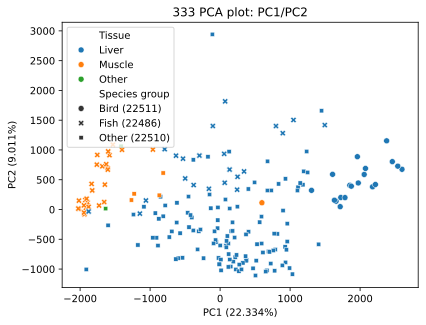

In [36]:
from IPython.core.display import SVG
SVG(filename="../pca/333/LC-Bruker maXis QTOF: Submission #11/PC1_PC2.svg")

Looking at the top 10 loadings along PC1 can help elucidate what compounds were responsible for driving this sample separation. We can see that the compound 'Inosine' was particularly associated with negative PC1 scores. This suggests a link between inosine and muscle tissue in fish. Indeed, inosine (a type of nuceloside found in tRNAs) has been shown to form as a [degradation product of ATP in chill-stored post-mortem fish storage](https://academic.oup.com/ijfst/article/41/4/341/7863908), which may explain this finding. 

In a similar way we can see that a type of octadecatrienoic acid is associated with some liver tissue samples, especially that of birds. Searching for the [compound on the pubchem database](https://pubchem.ncbi.nlm.nih.gov/compound/5497123) we find that it is primary peroxidation product of alpha-linoleic acid, an intermediate compound metabolism of certain lipids like prostaglandin, a function which occurs primarily in the liver of most organisms. 

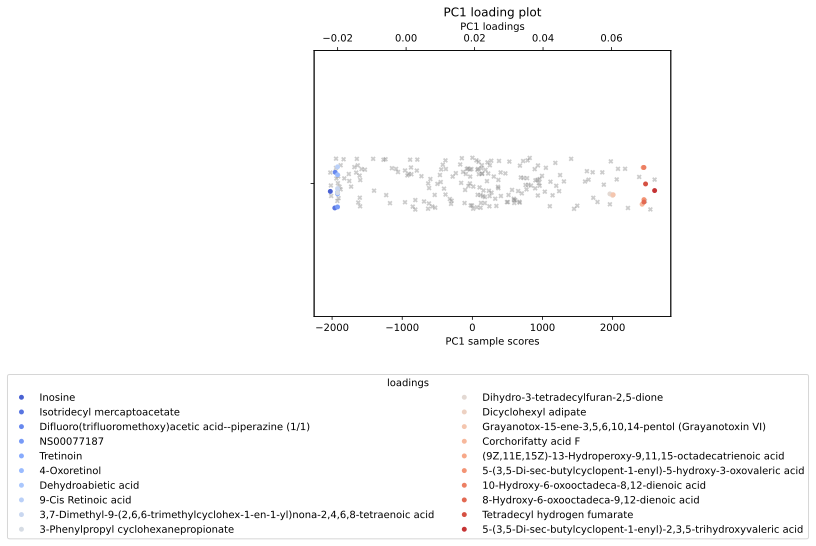

In [86]:
SVG(filename="../pca/333/LC-Bruker maXis QTOF: Submission #11/PC1_loadings.svg")

The loadings that PCA gives us are averaged across many samples, so to confirm the trends indicated by the PCA plots, we can access the raw data and create box plots of the compounds of interest across the relevant metadata categories. The boxplots below support our interpretation of the PCA, namely that inosine is concentration in fish liver tissue, and octadecatrienoic acid is mainly found in bird liver tissue. 

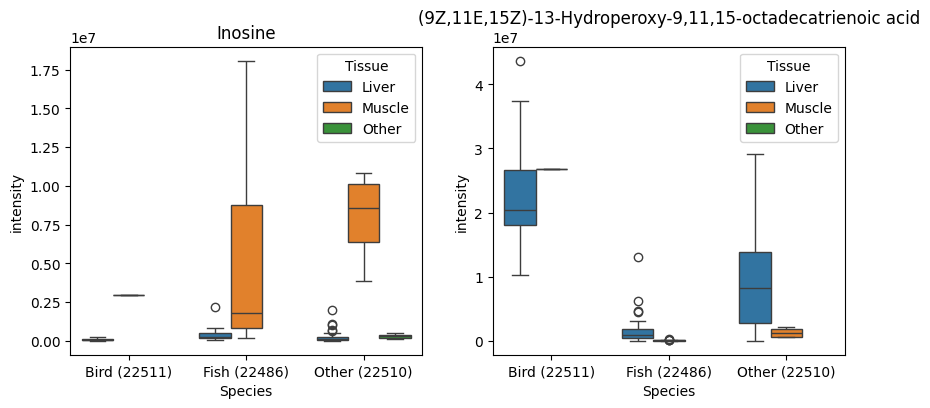

In [98]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10,4)
compoundNames = ['Inosine','(9Z,11E,15Z)-13-Hydroperoxy-9,11,15-octadecatrienoic acid']
# read metadata table
metaData = pd.read_csv("../metadata/333_metadata.csv", index_col=0)
# make metadata row order match ordination data row order
metaData = metaData.set_index('ID').loc[ordinationData.index,:]
#filter both datasets to be just submission 11 
boolFilter = metaData['Instrument setup used'] == "LC-Bruker maXis QTOF: Submission #11"
metaFilter = metaData.loc[boolFilter,:]
ordFilter = ordinationData.loc[boolFilter,:]
# loadings data
loadings = pd.read_csv('../pca/333/LC-Bruker maXis QTOF: Submission #11/PC1_loadings.csv', index_col=0)
for i in range (0,len(compoundNames)):
    # retrieve nsid for the compound of interest 
    nsid = loadings.set_index('mols').loc[compoundNames[i],'sus']
    #create a dataframe to plot from
    plotData = pd.DataFrame() 
    plotData['intensity'] = ordFilter[nsid]
    #move the metadata rows to plot data 
    plotData['Tissue'] = metaFilter['Tissue']
    plotData['Species'] = metaFilter['Species group']
    #use seaborn to plot 
    sns.boxplot(data=plotData,y='intensity',x='Species',hue='Tissue', ax=axes[i])
    axes[i].set_title(compoundNames[i])

# Linear Discriminant Analysis

LDA is a supervised dimensionality reduction technique similar to PCA but involves projecting the samples in a way that maximises the ratio of the between-group variance to the within-group variance[11]. Group can be any metadata variable from the metadata table. Analysis of sample loadings then allow the compounds that show the greatest variation between groups to be identified. 